In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
#data
file= r'../data/dose_grids_values.xlsx' 
v1_p5 = pd.read_excel(file, sheet_name='5')
v1_p10 = pd.read_excel(file, sheet_name='10')
v1_p15 = pd.read_excel(file, sheet_name='15')
farmer = pd.read_excel(file, sheet_name='farmer_chamber')
locations = [-10, -5, 0, 5, 10]
cf = 3460 #calibration factor 

In [3]:
v1_p5/cf

,1,2,3,4,5
a,NaN,NaN,6.831744,NaN,NaN
b,NaN,12.655708,7.687813,5.376975,NaN
c,20.904913,13.517341,7.847881,5.678998,3.943497
d,NaN,13.198902,8.159249,5.109538,NaN
e,NaN,NaN,6.917775,NaN,NaN


In [4]:
farmer

,depth_cm,-5,0,5
0,5,13.942559,8.620997,5.739384
1,10,13.034249,8.628945,5.449860
2,15,11.728553,7.811466,5.035444


In [5]:
#create color map from a base color map
basemap= cm.get_cmap('coolwarm', 256) #rainbow
newcolors = basemap(np.linspace(0, 1, 256))
newcolors[:, 3] = 0.7
newcmp = ListedColormap(newcolors)

# Dose Value Grids

In [6]:
#function for plotting the grid
def plotgrid(grid_pd):
    #create figure 
    fig, ax = plt.subplots()
    
    #round values for the matrix 
    matrix_grid = np.round(np.array(grid_pd), decimals=1) 
    
    #create matrix using matshow
    im = ax.matshow(matrix_grid, cmap=newcmp)  #choose color map we created

    #add text with number value for each pixel in the matrix
    for i in range(5):
        for j in range(5):
            c = matrix_grid[j,i]
            if not np.isnan(c):
                ax.text(i, j, str(c), va='center', ha='center')
         
    #ticks for the x, y axis
    labels = [-15, -10, -5, 0, 5, 10]
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.xaxis.set_ticks_position('bottom')
    
    #add labels to x, y axis
    ax.set_ylabel('Lateral (cm)')
    ax.set_xlabel('Longitudinal (cm)')

    #add colorbar with label
    fig.colorbar(im, label='Dose (cGy)')
    
    return ax, fig

Text(0.5,1.05,'depth = 10 cm')

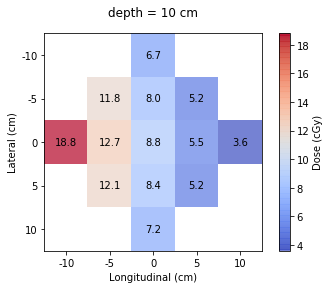

In [7]:
#plot a grid figure
ax, fig = plotgrid(v1_p10/cf)
ax.set_title('depth = 10 cm')

# Farmer Comparison

In [8]:
#slightly modified version of the function
def plotgrid(grid_pd, ax, fig):
    
    #round values for the matrix 
    matrix_grid = np.round(np.array(grid_pd), decimals=1) 
    
    #create matrix using matshow
    im = ax.matshow(matrix_grid, cmap=newcmp)  #choose color map we created

    #add text with number value for each pixel in the matrix
    for i in range(5):
        for j in range(5):
            c = matrix_grid[j,i]
            if not np.isnan(c):
                ax.text(i, j, str(c), va='center', ha='center')
         
    #ticks for the x, y axis
    labels = [-15, -10, -5, 0, 5, 10]
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.xaxis.set_ticks_position('bottom')

    #add labels to x, y axis
    ax.set_ylabel('Lateral (cm)')
    ax.set_xlabel('Longitudinal (cm)')

    #add colorbar with label
    fig.colorbar(im, label='Dose (cGy)')
    
    return ax, fig

In [16]:
def resplot(grid, chamber, title, errorp=0.037, locations=locations): #errorp is the error % for the error plot

    #create the figure and set the ratios for the different plots
    fig = plt.figure(figsize=(13, 5))
    gs = gridspec.GridSpec(nrows=2, ncols= 2, height_ratios=[3,1], width_ratios=[1,1])
    
    #add a subplot and plot a matrix on it
    ax0 = fig.add_subplot(gs[0:, 0])
    plotgrid(grid, ax0, fig)

    #add to subplots with a shared x axis to plot longitudinal dose and response
    ax2 = fig.add_subplot(gs[1, 1])
    ax1 = fig.add_subplot(gs[0, 1], sharex=ax2)
    plt.setp(ax1.get_xticklabels(), visible=False)

    #longitudinal dose with error bars
    #error is just a percentage (errorp) of values 
    ax1.errorbar(locations, grid.loc['c'], yerr=grid.loc['c']*errorp, fmt='c.', capsize=3, label='nanoDots')
    ax1.plot(chamber[1:4], 'rx', label='Farmer Chamber')
    ax1.legend()
    ax1.set_ylabel('Dose (cGy)')
    ax1.set_title('Longitudinal Dose Profile')

    #response plot
    response = np.array(grid.loc['c'][1:4])/np.array((chamber[1:4])) #calculate response (ratio)
    ax2.errorbar([-5,0,5], response, yerr=response*errorp, fmt='k.', capsize=3, label='OSLD/IC')
    ax2.hlines(xmin=-10, xmax=10, y=1, linestyles='--') #plot horizontal line at y=1
    ax2.legend(loc='upper right')
    ax2.set_ylabel('Response')
    ax2.set_xlabel('Distance (cm)')

    #add a title for the whole figure
    fig.suptitle(title)
    
    return response, fig

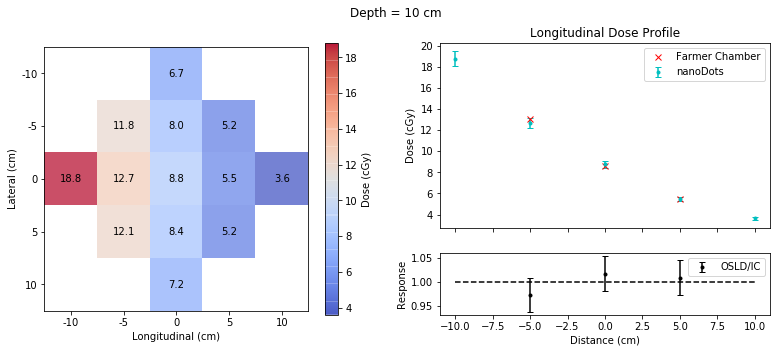

In [17]:
responses, fig = resplot(grid=v1_p10/cf, chamber=farmer.loc[1], title='Depth = 10 cm')
fig.savefig('../images/grids_responses.png', dpi=300)